In [1]:
## standard libraries
import pandas as pd
import numpy as np
## visuals
import seaborn as sns
import matplotlib.pyplot as plt
## ML related


In [2]:
df = sns.load_dataset('tips')

In [3]:
# df.head()

### Aranging columns

In [4]:
df = df[['day','time','size','smoker','sex','total_bill','tip']]

In [5]:
# df.head()

### Moving columns

In [6]:
col = df.pop('sex') 
df.insert(3,'sex',col)

In [7]:
df.head()

,day,time,size,sex,smoker,total_bill,tip
0,Sun,Dinner,2,Female,No,16.99,1.01
1,Sun,Dinner,3,Male,No,10.34,1.66
2,Sun,Dinner,3,Male,No,21.01,3.50
3,Sun,Dinner,2,Male,No,23.68,3.31
4,Sun,Dinner,4,Female,No,24.59,3.61


### Data Info and description

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         244 non-null    category
 1   time        244 non-null    category
 2   size        244 non-null    int64   
 3   sex         244 non-null    category
 4   smoker      244 non-null    category
 5   total_bill  244 non-null    float64 
 6   tip         244 non-null    float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00


### Null Check

In [10]:
df.isnull().sum()

day           0
time          0
size          0
sex           0
smoker        0
total_bill    0
tip           0
dtype: int64

### Visualizations

### Data Distribution plots 
### Either use displot / histplot with kde = True

In [11]:
cols = ['size','total_bill','tip']
colors = ['green','blue','red']

				 size




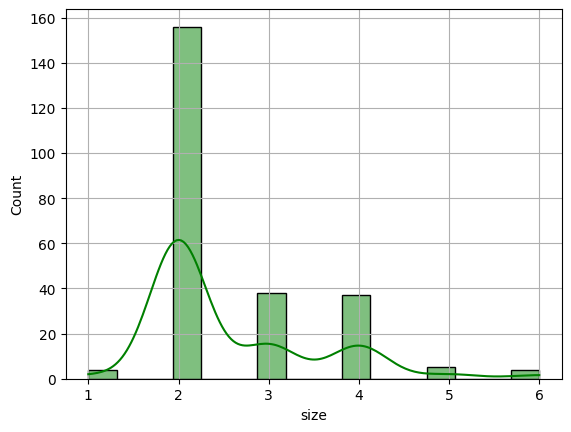



				 total_bill




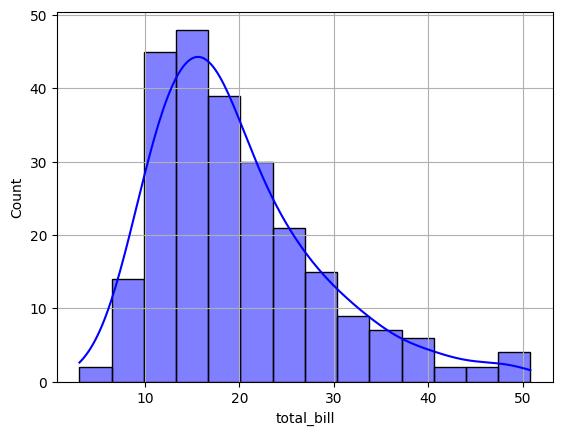



				 tip




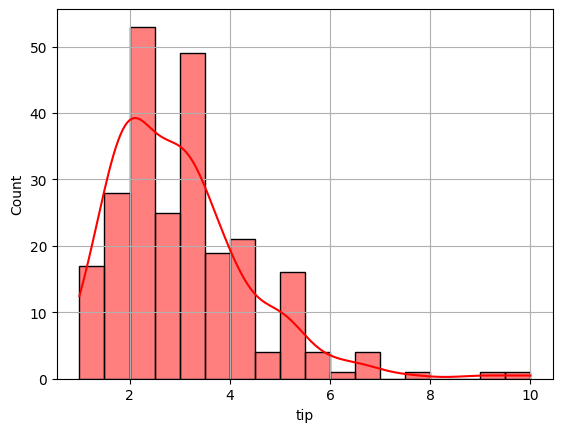

In [12]:
for i,j in zip(cols,colors):
    print('\t\t\t\t',i)
    print('\n')
    sns.histplot(df[i],kde=True,color=j)
    plt.grid()
    plt.xlabel(i,loc='center')
    plt.show()
    print('\n')



# sns.histplot(df['size'],kde=True,color='green')
# plt.grid()
# plt.show()

# ## or 


# sns.displot(df['size'],kde=True)
# plt.show()
    

In [13]:
import warnings
warnings.filterwarnings('ignore')

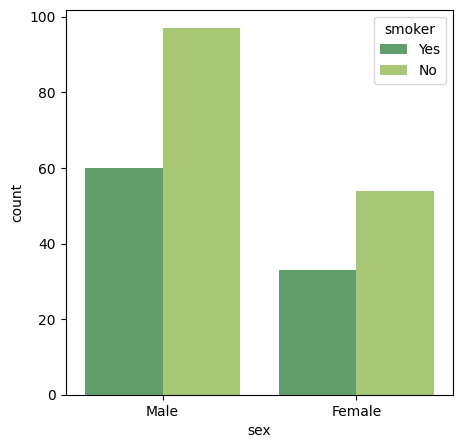

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64


In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x = df['sex'], palette='summer', hue = df['smoker'])
plt.show()
print(df.groupby('sex')['smoker'].value_counts())

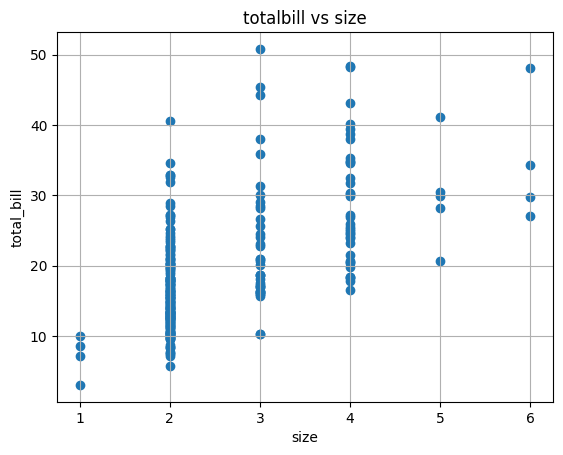

In [15]:
plt.scatter(x = 'size', y = 'total_bill', data=df)
plt.xlabel('size')
plt.ylabel('total_bill')
plt.title('totalbill vs size')
plt.grid()
plt.show()

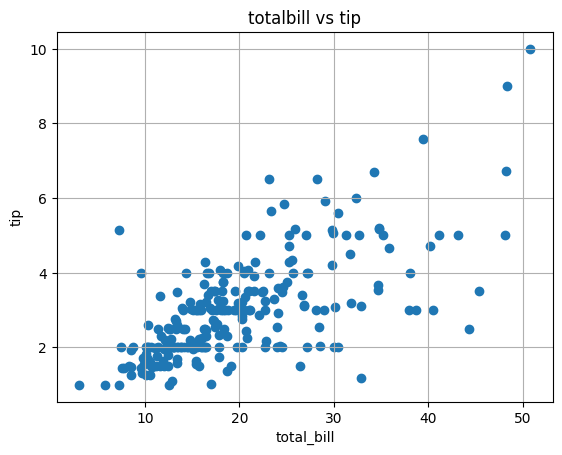

In [16]:
plt.scatter(x = 'total_bill', y = 'tip', data=df,)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('totalbill vs tip')
plt.grid()
plt.show()

In [17]:
sex_avg = pd.DataFrame(df.groupby('sex')['total_bill'].mean())
sex_avg = sex_avg.reset_index()

In [18]:
sex_avg

,sex,total_bill
0,Male,20.744076
1,Female,18.056897


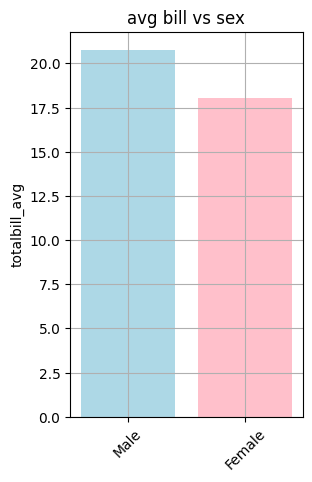

In [19]:
plt.figure(figsize=(3,5))
plt.bar(sex_avg['sex'], sex_avg['total_bill'], color = ['lightblue','pink'])
plt.grid()
plt.ylabel('totalbill_avg')
plt.title('avg bill vs sex')
plt.xticks(rotation = 45)
plt.show()

In [20]:
day_avg = pd.DataFrame(df.groupby('day')['total_bill'].mean())
day_avg = day_avg.reset_index()

In [21]:
day_avg

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


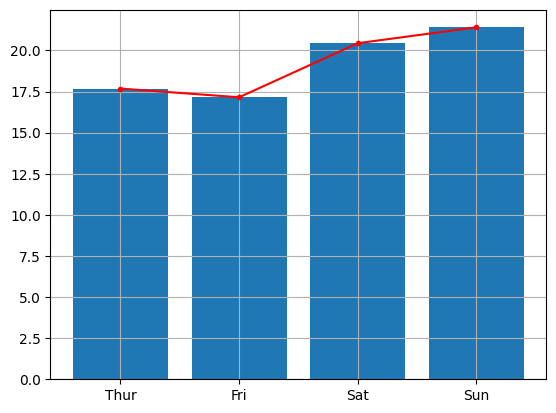

In [22]:
plt.plot(day_avg['day'], day_avg['total_bill'],marker = '.', color ='red')
plt.bar(day_avg['day'], day_avg['total_bill'])
plt.grid()
plt.show()

In [23]:
time_avg = pd.DataFrame(df.groupby('time')['total_bill'].mean())
time_avg = time_avg.reset_index()

In [24]:
time_avg

,time,total_bill
0,Lunch,17.168676
1,Dinner,20.797159


In [26]:
# !pip install plotly

In [27]:
import plotly.express as px

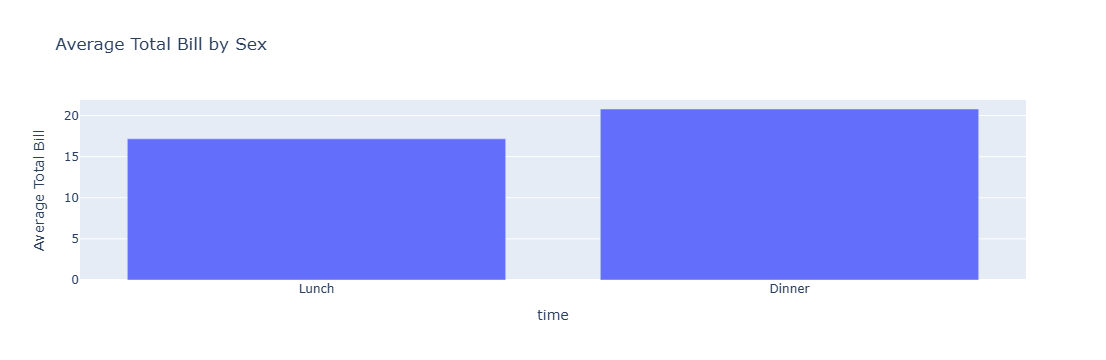

In [144]:
fig = px.bar(time_avg, x='time', y='total_bill', title='Average Total Bill by Sex',
    labels={'sex': 'Sex', 'total_bill': 'Average Total Bill'}
)

fig.show()

In [28]:
df.head()

,day,time,size,sex,smoker,total_bill,tip
0,Sun,Dinner,2,Female,No,16.99,1.01
1,Sun,Dinner,3,Male,No,10.34,1.66
2,Sun,Dinner,3,Male,No,21.01,3.50
3,Sun,Dinner,2,Male,No,23.68,3.31
4,Sun,Dinner,4,Female,No,24.59,3.61


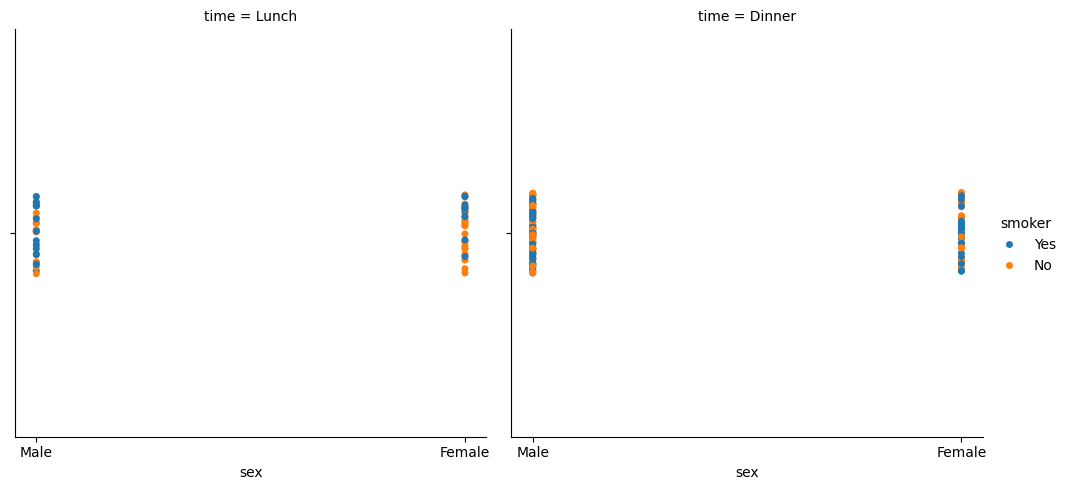

In [153]:
sns.catplot( x= df['sex'] , hue= df['smoker'], col=df['time'])

## Data Analysis

In [158]:
df['tip'].mean()

np.float64(2.99827868852459)

In [162]:
df['tip'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
tip,244.0,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0


<Axes: >

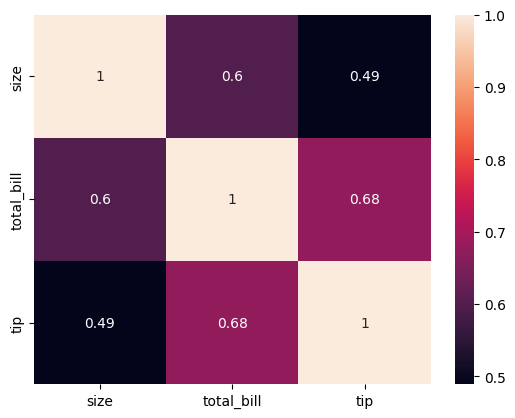

In [166]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [171]:
df['total_bill'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81


In [29]:
tot_bill_grp = []
for i in df['total_bill']:
    if 0 <= i < 10:
        tot_bill_grp.append('0 to 9')
    elif 10 <= i < 20:
        tot_bill_grp.append('10 to 19')
    elif 20 <= i < 30:
        tot_bill_grp.append('20 to 29')
    elif 30 <= i < 40:
        tot_bill_grp.append('30 to 39')
    elif 40 <= i < 50:
        tot_bill_grp.append('40 to 49')
    elif 50 <= i < 60:
        tot_bill_grp.append('50 to 59')
    else:
        tot_bill_grp.append('60+')
    

In [30]:
df['tot_bill_grp'] = tot_bill_grp

In [31]:
df['tot_bill_grp'].value_counts()

tot_bill_grp
10 to 19    130
20 to 29     65
30 to 39     22
0 to 9       17
40 to 49      9
50 to 59      1
Name: count, dtype: int64

In [32]:
df.groupby(['tot_bill_grp'])['tip'].max()

tot_bill_grp
0 to 9       5.15
10 to 19     4.30
20 to 29     6.50
30 to 39     7.58
40 to 49     9.00
50 to 59    10.00
Name: tip, dtype: float64

### Getting the average tip received on the total_bill group

In [33]:
grp_size = pd.DataFrame(df.groupby(['tot_bill_grp','size'])['tip'].mean())
grp_size['unique'] = df.groupby(['tot_bill_grp','size'])['tip'].unique()
grp_size

tip  \
tot_bill_grp size              
0 to 9       1      1.306667   
             2      1.951429   
10 to 19     1      1.830000   
             2      2.410667   
             3      2.701667   
             4      2.600000   
20 to 29     2      3.335161   
             3      3.741538   
             4      3.758125   
             5      4.380000   
             6      4.600000   
30 to 39     2      3.202000   
             3      3.917500   
             4      4.710909   
             5      2.000000   
             6      6.700000   
40 to 49     2      3.000000   
             3      3.000000   
             4      6.365000   
             5      5.000000   
             6      5.000000   
50 to 59     3     10.000000   

                                                              unique  
tot_bill_grp size                                                     
0 to 9       1                                           [1.0, 1.92]  
             2     [2.0, 1.45, 1.32, 1.56, 1.0, 1.48, 1.25, 1.5, ...  
10 to 19     1                                                [1.83]  
             2     [1.01, 1.96, 3.23, 1.71, 1.57, 3.02, 4.08, 2.2...  
             3     [1.66, 1.67, 3.71, 3.5, 2.0, 3.07, 2.31, 2.24,...  
             4                           [3.0, 2.34, 2.5, 3.76, 2.0]  
20 to 29     2     [3.31, 3.92, 2.75, 4.3, 5.0, 1.5, 3.21, 2.01, ...  
             3     [3.5, 3.35, 3.6, 2.05, 3.15, 4.0, 2.18, 3.48, ...  
             4     [3.61, 4.71, 3.12, 2.45, 4.34, 4.0, 5.07, 2.92...  
             5                                      [5.14, 5.0, 3.0]  
             6                                            [4.2, 5.0]  
30 to 39     2                         [5.0, 3.18, 3.11, 3.55, 1.17]  
             3                                 [5.0, 4.0, 2.0, 4.67]  
             4     [5.0, 7.58, 5.6, 6.0, 5.2, 3.0, 5.17, 4.5, 3.6...  
             5                                                 [2.0]  
             6                                                 [6.7]  
40 to 49     2                                                 [3.0]  
             3                                            [2.5, 3.5]  
             4                                [6.73, 4.73, 5.0, 9.0]  
             5                                                 [5.0]  
             6                                                 [5.0]  
50 to 59     3                                                [10.0]

In [34]:
pd.DataFrame(df.groupby(['size','tot_bill_grp'])['tip'].mean())

tip
size tot_bill_grp           
1    0 to 9         1.306667
     10 to 19       1.830000
2    0 to 9         1.951429
     10 to 19       2.410667
     20 to 29       3.335161
     30 to 39       3.202000
     40 to 49       3.000000
3    10 to 19       2.701667
     20 to 29       3.741538
     30 to 39       3.917500
     40 to 49       3.000000
     50 to 59      10.000000
4    10 to 19       2.600000
     20 to 29       3.758125
     30 to 39       4.710909
     40 to 49       6.365000
5    20 to 29       4.380000
     30 to 39       2.000000
     40 to 49       5.000000
6    20 to 29       4.600000
     30 to 39       6.700000
     40 to 49       5.000000

In [35]:
df['Tip_%'] = (df['tip'] * 100)/df['total_bill']

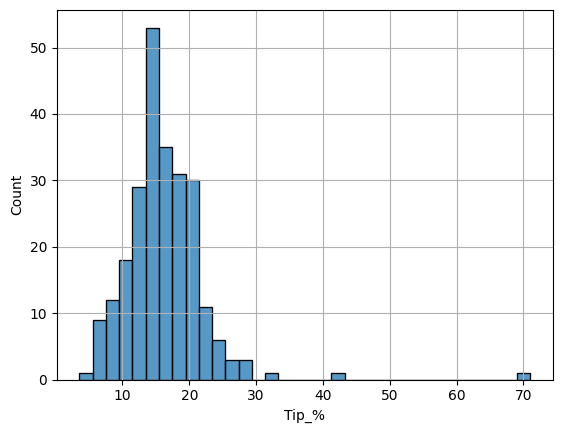

In [36]:
sns.histplot(df['Tip_%'])
plt.grid()
plt.show()

In [37]:
df['Tip_%'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Tip_%,244.0,16.080258,6.10722,3.563814,12.912736,15.476977,19.147549,71.034483


In [38]:
df['Tip_%'].mode()

0    14.482259
1    15.384615
2    17.574692
Name: Tip_%, dtype: float64

In [39]:
df['Tip_%'].nunique()

241

## Grouping based on Day

In [40]:
df.groupby(['day','time'])['total_bill'].sum().sort_values(ascending=False), df[['day','time']].value_counts().sort_values(ascending=False)

(day   time  
 Sat   Dinner    1778.40
 Sun   Dinner    1627.16
 Thur  Lunch     1077.55
 Fri   Dinner     235.96
       Lunch       89.92
 Thur  Dinner      18.78
 Sat   Lunch        0.00
 Sun   Lunch        0.00
 Name: total_bill, dtype: float64,
 day   time  
 Sat   Dinner    87
 Sun   Dinner    76
 Thur  Lunch     61
 Fri   Dinner    12
       Lunch      7
 Thur  Dinner     1
 Name: count, dtype: int64)

In [41]:
1778.40/87, 1627.16/76, 1096.33/62, 325.88/19

(20.44137931034483, 21.41, 17.682741935483868, 17.15157894736842)

In [42]:
## People coming in on Saturdays and Sundays spend 20 to 21 on average
## People coming in on Thursdays and Fridays spend 17+ on an average
## Dinner only on Saturdays and Sundays
## Mostly Lunch on Thursdays and very less Dinner 
## Mostly dinner on Fridays and few Dinner

In [43]:
df.groupby('sex')['total_bill'].sum()

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

In [44]:
## Male spend more on total_bill

In [45]:
df['day'].unique()
df['time'].unique()
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [46]:
df.loc[(df['day']=='Fri') & (df['time']=='Dinner')].sort_values(by=['total_bill'])

,day,time,size,sex,smoker,total_bill,tip,tot_bill_grp,Tip_%
92,Fri,Dinner,2,Female,Yes,5.75,1.00,0 to 9,17.391304
100,Fri,Dinner,2,Female,Yes,11.35,2.50,10 to 19,22.026432
97,Fri,Dinner,2,Male,Yes,12.03,1.50,10 to 19,12.468828
99,Fri,Dinner,2,Male,No,12.46,1.50,10 to 19,12.038523
101,Fri,Dinner,2,Female,Yes,15.38,3.00,10 to 19,19.505852
93,Fri,Dinner,2,Female,Yes,16.32,4.30,10 to 19,26.348039
98,Fri,Dinner,2,Male,Yes,21.01,3.00,20 to 29,14.278915
91,Fri,Dinner,2,Male,No,22.49,3.50,20 to 29,15.562472
94,Fri,Dinner,2,Female,No,22.75,3.25,20 to 29,14.285714
96,Fri,Dinner,2,Male,Yes,27.28,4.00,20 to 29,14.662757


### Grouping based on Tip_%

In [47]:
df.groupby('sex')['Tip_%'].mean()

sex
Male      15.765055
Female    16.649074
Name: Tip_%, dtype: float64

In [48]:
## Females tip slightly more on an average

In [49]:
df.groupby('smoker')['Tip_%'].mean()

smoker
Yes    16.319604
No     15.932846
Name: Tip_%, dtype: float64

In [50]:
## Smokers tip slightly more

In [51]:
df.groupby('day')['Tip_%'].mean().sort_values()

day
Sat     15.315172
Thur    16.127563
Sun     16.689729
Fri     16.991303
Name: Tip_%, dtype: float64

In [52]:
## most tips on fridays and Sundays

In [53]:
df.groupby('time')['Tip_%'].mean()

time
Lunch     16.412793
Dinner    15.951779
Name: Tip_%, dtype: float64

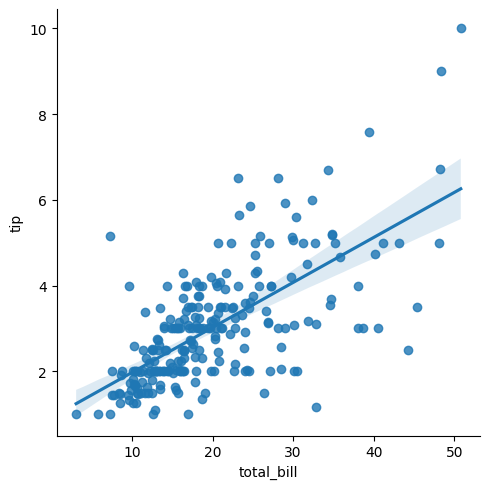

In [54]:
sns.lmplot(x='total_bill', y='tip', data=df)

### Tips increases as the total_bill increases

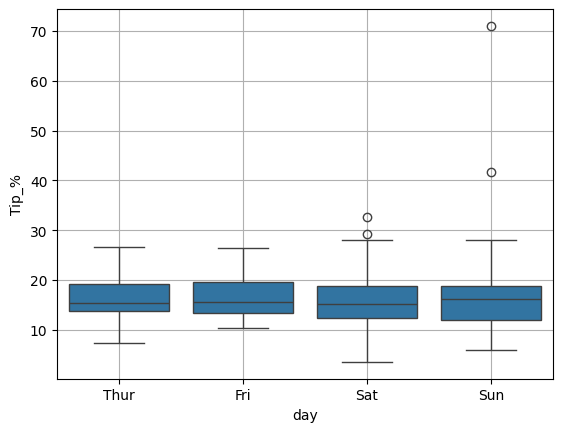

In [55]:
sns.boxplot(x='day', y='Tip_%', data=df)
plt.grid()
plt.show()

In [56]:
## More tips on saturdays and sundays

<Axes: xlabel='sex', ylabel='Tip_%'>

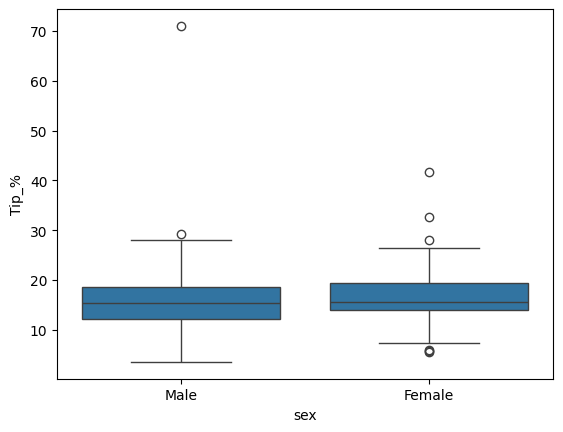

In [57]:
sns.boxplot(x='sex', y='Tip_%', data=df)

In [58]:
## almost equal

<Axes: xlabel='smoker', ylabel='Tip_%'>

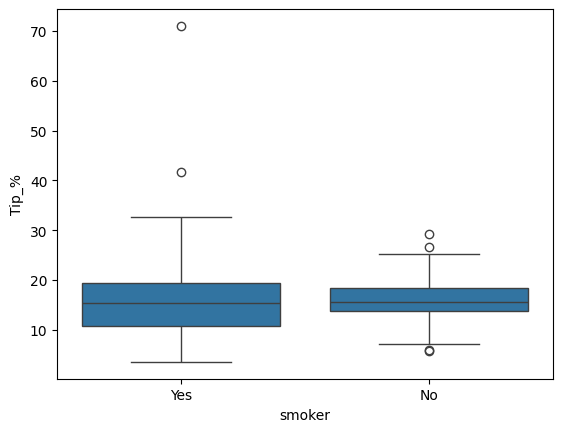

In [59]:
sns.boxplot(x='smoker', y='Tip_%', data=df)

In [60]:
## Smokers tip more 

In [61]:
## Questions

# 1. Which day gives the highest tip %?
# 2. Which gender tips better during dinner?

In [78]:
df.groupby('time')['tip'].mean().sort_values()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [63]:
## Sunday has the highest tip% with 71%

In [64]:
df.where(df['time']=='Dinner').groupby('sex')['tip'].mean()

sex
Male      3.144839
Female    3.002115
Name: tip, dtype: float64

In [65]:
## Males tip slightly better during dinner

In [76]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

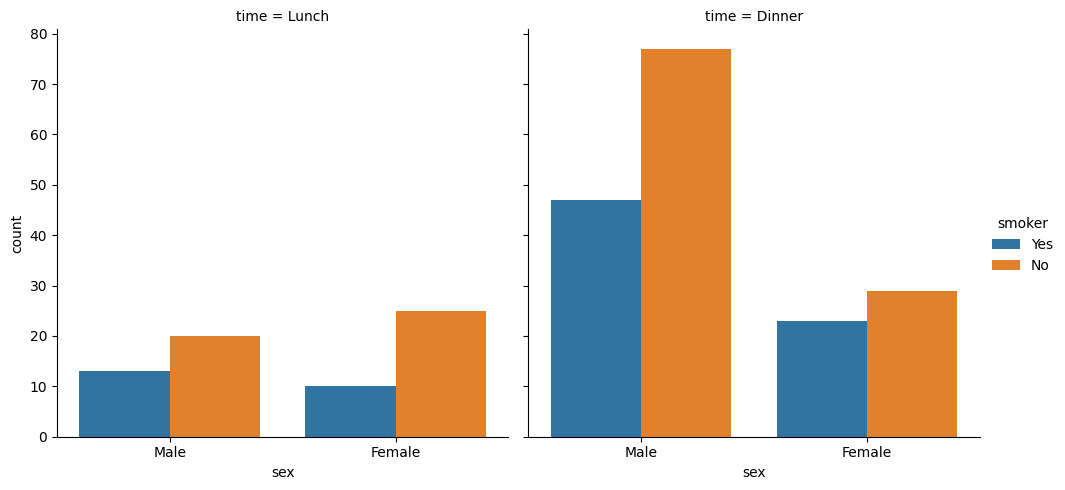

In [66]:
sns.catplot(
    x='sex', 
    hue='smoker', 
    col='time',
    kind='count',
    data=df
)

In [67]:
df.head()

,day,time,size,sex,smoker,total_bill,tip,tot_bill_grp,Tip_%
0,Sun,Dinner,2,Female,No,16.99,1.01,10 to 19,5.944673
1,Sun,Dinner,3,Male,No,10.34,1.66,10 to 19,16.054159
2,Sun,Dinner,3,Male,No,21.01,3.50,20 to 29,16.658734
3,Sun,Dinner,2,Male,No,23.68,3.31,20 to 29,13.978041
4,Sun,Dinner,4,Female,No,24.59,3.61,20 to 29,14.680765


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   day           244 non-null    category
 1   time          244 non-null    category
 2   size          244 non-null    int64   
 3   sex           244 non-null    category
 4   smoker        244 non-null    category
 5   total_bill    244 non-null    float64 
 6   tip           244 non-null    float64 
 7   tot_bill_grp  244 non-null    object  
 8   Tip_%         244 non-null    float64 
dtypes: category(4), float64(3), int64(1), object(1)
memory usage: 11.2+ KB


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [71]:
df.drop('Tip_%',axis=1, inplace=True)

In [86]:
df.head()

,day,time,size,sex,smoker,total_bill,tip,tot_bill_grp
0,Sun,Dinner,2,Female,No,16.99,1.01,10 to 19
1,Sun,Dinner,3,Male,No,10.34,1.66,10 to 19
2,Sun,Dinner,3,Male,No,21.01,3.50,20 to 29
3,Sun,Dinner,2,Male,No,23.68,3.31,20 to 29
4,Sun,Dinner,4,Female,No,24.59,3.61,20 to 29


In [87]:
ml = df.copy()

In [91]:
oe_day = OrdinalEncoder(categories=[['Fri','Thur','Sat','Sun']])
oe_time = OrdinalEncoder(categories=[['Lunch','Dinner']])
oe_sex = OrdinalEncoder(categories=[['Female','Male']])
oe_smok = OrdinalEncoder(categories=[['No','Yes']])
oe_tbg = OrdinalEncoder(categories=[['0 to 9','10 to 19','20 to 29','30 to 39','40 to 49','50 to 59']])


In [93]:
ml['day'] = oe_day.fit_transform(ml[['day']])
ml['time'] = oe_time.fit_transform(ml[['time']])
ml['sex'] = oe_sex.fit_transform(ml[['sex']])
ml['smoker'] = oe_smok.fit_transform(ml[['smoker']])
ml['tot_bill_grp'] = oe_tbg.fit_transform(ml[['tot_bill_grp']])

In [94]:
ml.head()

,day,time,size,sex,smoker,total_bill,tip,tot_bill_grp
0,3.0,1.0,2,0.0,0.0,16.99,1.01,1.0
1,3.0,1.0,3,1.0,0.0,10.34,1.66,1.0
2,3.0,1.0,3,1.0,0.0,21.01,3.50,2.0
3,3.0,1.0,2,1.0,0.0,23.68,3.31,2.0
4,3.0,1.0,4,0.0,0.0,24.59,3.61,2.0


In [95]:
x = ml.drop('tip',axis=1)
y = ml[['tip']]

In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.05 , random_state=42)

In [102]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
lr_preds = lr.predict(xtest)

In [110]:
# lr_preds

In [111]:
lr_r2 = r2_score(ytest, lr_preds)

In [112]:
lr_r2

0.25711069897219985

In [145]:
lr_mse = mean_squared_error(ytest,lr_preds)
lr_rmse = np.sqrt(mse)

In [146]:
lr_mse

0.6594175558371678

In [147]:
lr_rmse

np.float64(0.8120452917400407)

In [125]:
3-rmse

np.float64(2.1879547082599595)

In [127]:
3+rmse

np.float64(3.8120452917400405)

In [149]:
lr_mae = mean_absolute_error(ytest,lr_preds)
lr_mae

print('r2 : ',lr_r2)
print('rmse : ', lr_rmse)
print('mae : ', lr_mae)

r2 :  0.25711069897219985
rmse :  0.8120452917400407
mae :  0.6358464059826823


In [131]:
knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)
knn_preds = knn.predict(xtest)
knn_r2 = r2_score(ytest, knn_preds)
knn_rmse = np.sqrt(mean_squared_error(ytest, knn_preds))
knn_mae = mean_absolute_error(ytest,knn_preds)

print('r2 : ',knn_r2)
print('rmse : ',knn_rmse)
print('mae : ',knn_mae)

r2 :  -0.09874702521815082
rmse :  0.9875681086541676
mae :  0.7364615384615385


In [132]:
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dt_preds = dt.predict(xtest)
dt_r2 = r2_score(ytest, dt_preds)
dt_rmse = np.sqrt(mean_squared_error(ytest, dt_preds))
dt_mae = mean_absolute_error(ytest, dt_preds)

print('r2 : ', dt_r2)
print('rmse : ', dt_rmse)
print('mae : ', dt_mae)

r2 :  -1.3900827272666665
rmse :  1.45654755131124
mae :  1.1223076923076922


In [135]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
rf_preds = rf.predict(xtest)
rf_r2 = r2_score(ytest, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(ytest, rf_preds))
rf_mae = mean_absolute_error(ytest, rf_preds)

print('r2 : ', rf_r2)
print('rmse : ', rf_rmse)
print('mae : ', rf_mae)

r2 :  -0.06912364579930785
rmse :  0.974164206265674
mae :  0.7670076923076922


In [137]:
ab = AdaBoostRegressor()
ab.fit(xtrain, ytrain)
ab_preds = ab.predict(xtest)
ab_r2 = r2_score(ytest, ab_preds)
ab_rmse = np.sqrt(mean_squared_error(ytest, ab_preds))
ab_mae = mean_absolute_error(ytest, ab_preds)

print('r2 : ', ab_r2)
print('rmse : ', ab_rmse)
print('mae : ', ab_mae)

r2 :  0.0832415737854928
rmse :  0.9020812499481816
mae :  0.7190980969072159


In [138]:
bag = BaggingRegressor()
bag.fit(xtrain, ytrain)
bag_preds = bag.predict(xtest)
bag_r2 = r2_score(ytest, bag_preds)
bag_rmse = np.sqrt(mean_squared_error(ytest, bag_preds))
bag_mae = mean_absolute_error(ytest, bag_preds)

print('r2 : ', bag_r2)
print('rmse : ', bag_rmse)
print('mae : ', bag_mae)

r2 :  -0.5314669190925996
rmse :  1.1659287483177718
mae :  0.8429230769230768


In [139]:
gb = GradientBoostingRegressor()
gb.fit(xtrain, ytrain)
gb_preds = gb.predict(xtest)
gb_r2 = r2_score(ytest, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(ytest, gb_preds))
gb_mae = mean_absolute_error(ytest, gb_preds)

print('r2 : ', gb_r2)
print('rmse : ', gb_rmse)
print('mae : ', gb_mae)

r2 :  0.20015953894738991
rmse :  0.8425969556100544
mae :  0.6200486960796524


In [140]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
xgb_preds = xgb.predict(xtest)
xgb_r2 = r2_score(ytest, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(ytest, xgb_preds))
xgb_mae = mean_absolute_error(ytest, xgb_preds)

print('r2 : ', xgb_r2)
print('rmse : ', xgb_rmse)
print('mae : ', xgb_mae)

r2 :  -0.8751125335693359
rmse :  1.2901251834188812
mae :  0.8072648644447327


In [141]:
xgbrf = XGBRFRegressor()
xgbrf.fit(xtrain, ytrain)
xgbrf_preds = xgbrf.predict(xtest)
xgbrf_r2 = r2_score(ytest, xgbrf_preds)
xgbrf_rmse = np.sqrt(mean_squared_error(ytest, xgbrf_preds))
xgbrf_mae = mean_absolute_error(ytest, xgbrf_preds)

print('r2 : ', xgbrf_r2)
print('rmse : ', xgbrf_rmse)
print('mae : ', xgbrf_mae)

r2 :  -0.23945903778076172
rmse :  1.0489004667825321
mae :  0.772846519947052


In [142]:
cb = CatBoostRegressor()
cb.fit(xtrain, ytrain)
cb_preds = cb.predict(xtest)
cb_r2 = r2_score(ytest, cb_preds)
cb_rmse = np.sqrt(mean_squared_error(ytest, cb_preds))
cb_mae = mean_absolute_error(ytest, cb_preds)

print('r2 : ', cb_r2)
print('rmse : ', cb_rmse)
print('mae : ', cb_mae)

Learning rate set to 0.032481
0:	learn: 1.3828760	total: 133ms	remaining: 2m 12s
1:	learn: 1.3683068	total: 134ms	remaining: 1m 6s
2:	learn: 1.3538440	total: 134ms	remaining: 44.7s
3:	learn: 1.3387455	total: 135ms	remaining: 33.6s
4:	learn: 1.3235494	total: 136ms	remaining: 27s
5:	learn: 1.3107684	total: 136ms	remaining: 22.6s
6:	learn: 1.2973177	total: 137ms	remaining: 19.5s
7:	learn: 1.2849842	total: 138ms	remaining: 17.1s
8:	learn: 1.2715291	total: 139ms	remaining: 15.3s
9:	learn: 1.2589766	total: 139ms	remaining: 13.8s
10:	learn: 1.2461376	total: 140ms	remaining: 12.6s
11:	learn: 1.2355431	total: 141ms	remaining: 11.6s
12:	learn: 1.2253794	total: 141ms	remaining: 10.7s
13:	learn: 1.2119753	total: 142ms	remaining: 9.99s
14:	learn: 1.2047287	total: 143ms	remaining: 9.36s
15:	learn: 1.1940505	total: 143ms	remaining: 8.81s
16:	learn: 1.1855164	total: 144ms	remaining: 8.33s
17:	learn: 1.1734582	total: 145ms	remaining: 7.9s
18:	learn: 1.1647918	total: 145ms	remaining: 7.51s
19:	learn: 1.

In [143]:
lg = LGBMRegressor()
lg.fit(xtrain, ytrain)
lg_preds = lg.predict(xtest)
lg_r2 = r2_score(ytest, lg_preds)
lg_rmse = np.sqrt(mean_squared_error(ytest, lg_preds))
lg_mae = mean_absolute_error(ytest, lg_preds)

print('r2 : ', lg_r2)
print('rmse : ', lg_rmse)
print('mae : ', lg_mae)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 7
[LightGBM] [Info] Start training from score 3.021472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

## Results

In [ ]:
## LinearRegression

r2 :  0.25711069897219985
rmse :  0.8120452917400407
mae :  0.6358464059826823

In [ ]:
## GradientBoostingRegressor

r2 :  0.20015953894738991
rmse :  0.8425969556100544
mae :  0.6200486960796524

In [ ]:
## LGBMRegressor

r2 :  0.14081440381676313
rmse :  0.8732964497614417
mae :  0.6348057344381931

#### Best of all in-terms of MAE is GradientBoostingRegressor